# Sobre o algoritmo

O intuito desse jupyter notebook é desenvolver o algoritmo de rank de grafo, tendo como base o algoritmo PageRank de Stanford, criado por Larry Page, co-fundador da Google, muito utilizado para ranquear as páginas mais relevantes da Web pelos hiperlink conectados.

----------------
Bibliotecas utilizadas

In [119]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

-----------------------
Criando Grafo com arestas direcionadas

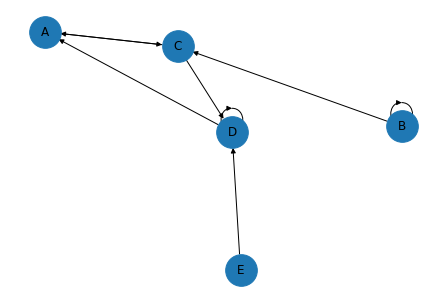

In [120]:
def create_graph(nodes, edges):
    G = nx. DiGraph()
    for i in range(nodes):
        G.add_node(chr(i+65))
    
    for i in range(edges):
        G.add_edge(chr(random.randint(65, nodes+64)), chr(random.randint(65, nodes+64)))

    return G

G = create_graph(5, 10)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000)
plt.show()


----------------
Criando matriz de adjacências para melhor visualização do grafo

[[0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


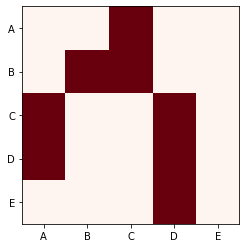

In [121]:
matriz = nx.to_numpy_matrix(G)
for i in range(len(matriz)):
    for j in range(len(matriz)):
        if G.has_edge(i, j):
            matriz[i][j] = 1

print(matriz)


plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(matriz)), list(G.nodes()))
plt.yticks(range(len(matriz)), list(G.nodes()))
plt.show()


----------------

Calculo de ranqueamento dos nós:

<div style="background-color: white; width: 300px">
    <img src="calc_to_rank.png">
</div>

In [122]:
def rank_to_graph(matriz, rank_nodes):
    if rank_nodes is None:
        rank_nodes = [1 / len(matriz) for i in range(len(matriz))]

    list_sum_arestas, list_r, list_rank = np.zeros(len(matriz)), np.zeros(len(matriz)), np.zeros(len(matriz))

    for i in range(len(matriz)):
        list_sum_arestas[i] = np.sum(matriz[i])

    for i in range(len(matriz)):
        list_r[i] = rank_nodes[i] / list_sum_arestas[i]
        
    for i in range(len(matriz)):
        for j in range(len(matriz)):
            list_to_sum_nodes = []
            if matriz[i,j] == 1 and i != j:
                list_to_sum_nodes = np.append(list_to_sum_nodes, list_r[i])
        list_rank[i] = (1 - 0.85) / len(matriz) + 0.85 * np.sum(list_to_sum_nodes)    
        
    rank_final = np.zeros((len(matriz), 1))
    for i in range(len(matriz)):
        rank_final[i] = list_rank[i]

    return rank_final

print(rank_to_graph(matriz, None))

[[0.03]
 [0.03]
 [0.03]
 [0.03]
 [0.03]]


[0.03 0.03 0.03 0.03 0.03]


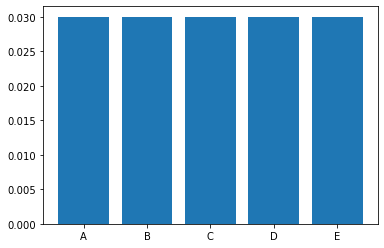

In [123]:
rank = np.zeros((len(matriz), 1))

for i in range(len(matriz)):
    rank[i] = rank_to_graph(matriz, None)[i]

k = 0
while k < 20:
    rank = np.append(rank, rank_to_graph(matriz, rank[:,-1]), axis = 1)
    k += 1

print(np.round(rank, decimals=3)[:,-1])

plt.bar(range(len(rank)), rank[:, -1])
plt.xticks(range(len(rank)), list(G.nodes()))
plt.show()



----------------

## Referências de estudos:

Algoritmo e cálculo para relevância do nó no grafo -
<a>https://pt.wikipedia.org/wiki/PageRank</a>

Biblioteca de grafos -
<a>https://networkx.org/documentation/stable/developer/index.html</a>